In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

## Machine learning for bulding predictive model for sleep disorder.


# Exploratory Data Analysis


In [571]:
sleep=pd.read_csv('sleep.csv')


In [520]:
sleep.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [521]:
sleep=sleep.drop('Person ID',axis=1)


In [572]:
## blood pressure variable separated by a slash converted to numerical format.
sleep[['Blood Pressure Systolic', 'Blood Pressure Diastolic']] = sleep['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric values
sleep['Blood Pressure Systolic'] = pd.to_numeric(sleep['Blood Pressure Systolic'], errors='coerce')
sleep['Blood Pressure Diastolic'] = pd.to_numeric(sleep['Blood Pressure Diastolic'], errors='coerce')

# Drop the original 'Blood Pressure' column
sleep = sleep.drop('Blood Pressure', axis=1)

### Visualizing the Distribution of Gender

<AxesSubplot:>

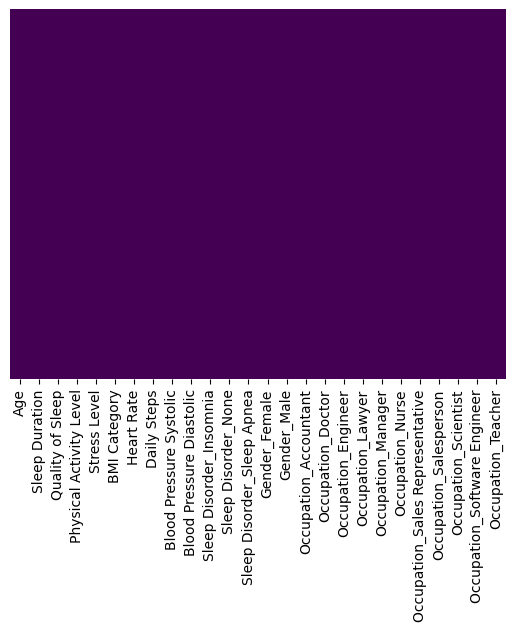

In [570]:
####Check missing data
sns.heatmap(sleep.isnull(),yticklabels=False,cbar=False,cmap='viridis')


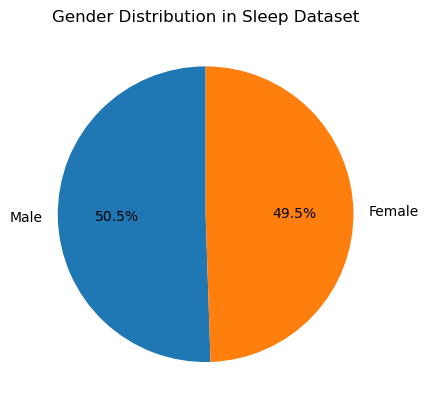

In [523]:
#Pie Chart
gender_pie = sleep['Gender'].value_counts()

plt.pie(gender_pie, labels=gender_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution in Sleep Dataset')
plt.show()

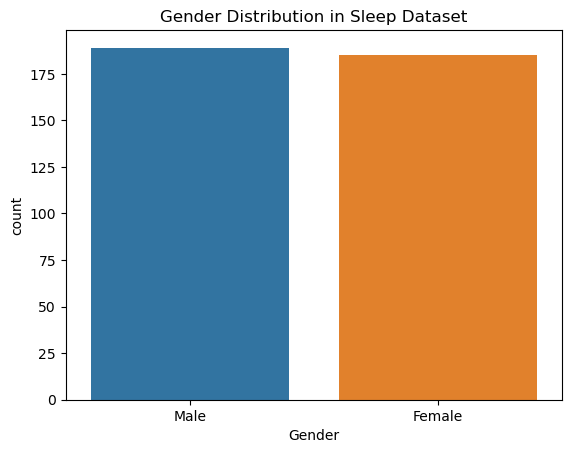

In [524]:
#Bar Chart
sns.countplot(data=sleep, x='Gender')
plt.title('Gender Distribution in Sleep Dataset')
plt.show()

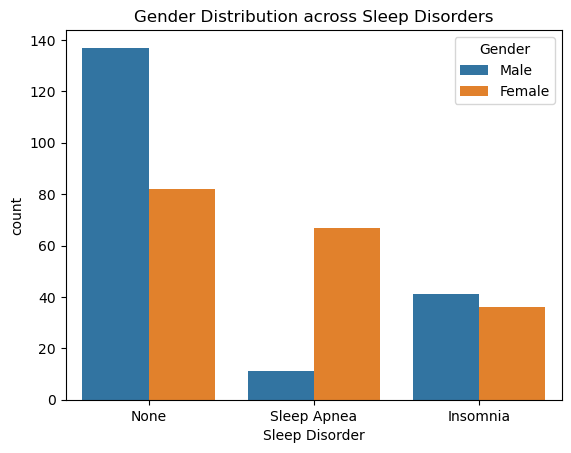

In [525]:
#Count Plot
sns.countplot(data=sleep, x='Sleep Disorder', hue='Gender')
plt.title('Gender Distribution across Sleep Disorders')
plt.show()

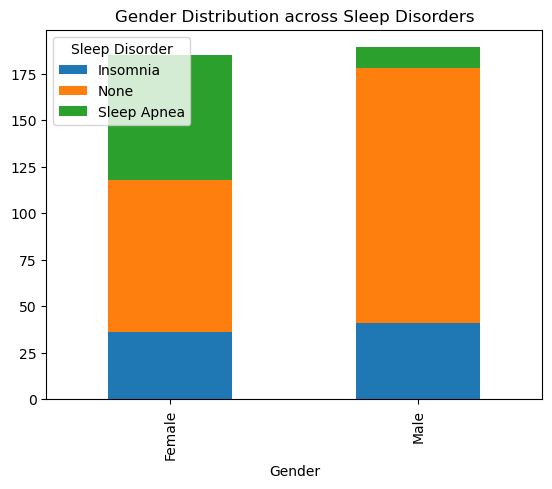

In [526]:
# Stacked Bar Chart
gender_sleep_df = pd.crosstab(sleep['Gender'], sleep['Sleep Disorder'])
gender_sleep_df.plot(kind='bar', stacked=True)
plt.title('Gender Distribution across Sleep Disorders')
plt.show()

### Visualizing the Distribution of age

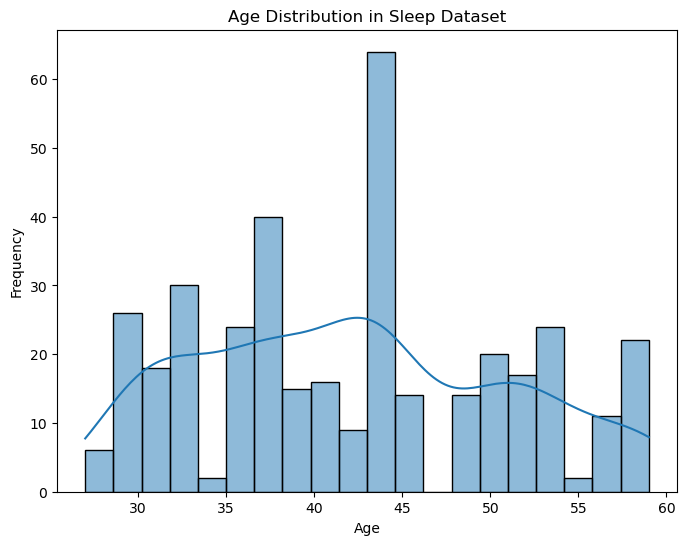

In [527]:
plt.figure(figsize=(8, 6))
sns.histplot(data=sleep, x='Age', bins=20, kde=True)
plt.title('Age Distribution in Sleep Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

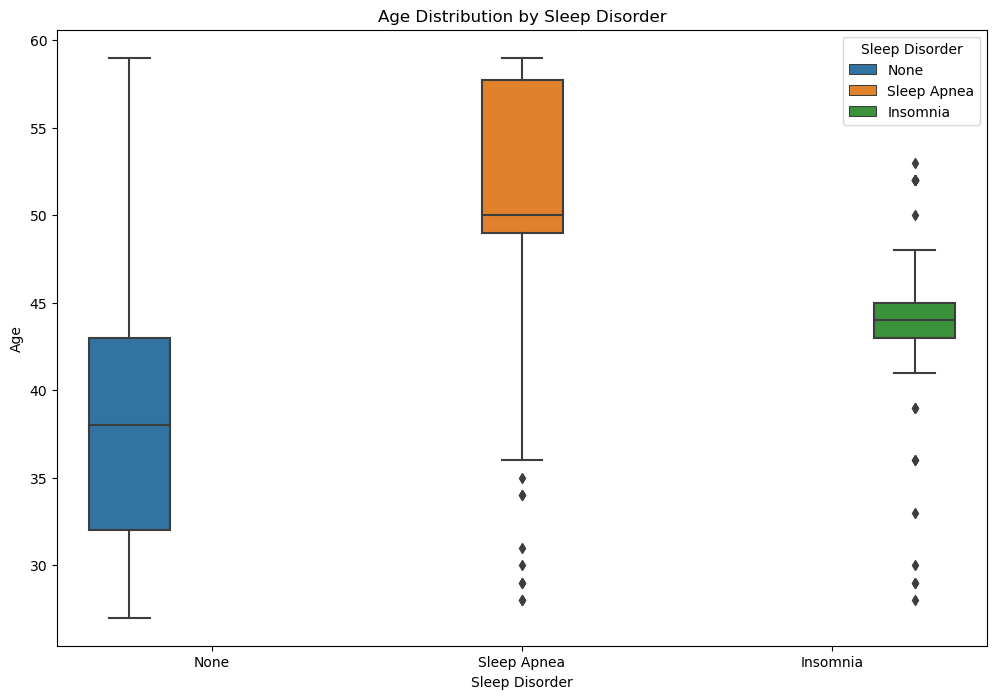

In [528]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=sleep, x='Sleep Disorder', y='Age', hue='Sleep Disorder')
plt.title('Age Distribution by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')
plt.legend(title='Sleep Disorder')
plt.show()

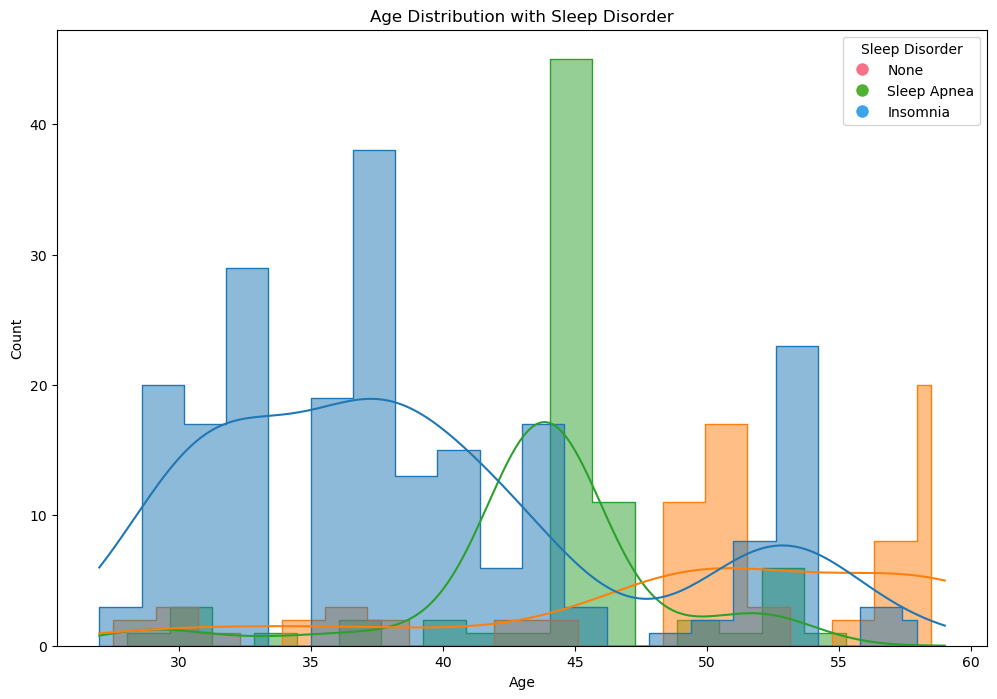

In [530]:
plt.figure(figsize=(12, 8))
sns.histplot(data=sleep, x='Age', hue='Sleep Disorder', multiple='dodge', bins=20, kde=True, element='step', stat='count', common_norm=False)

# Customize legend
legend_labels = sleep['Sleep Disorder'].unique()
colors = sns.color_palette('husl', n_colors=len(legend_labels))
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, colors)]

plt.legend(handles=handles, title='Sleep Disorder', loc='upper right')
plt.title('Age Distribution with Sleep Disorder')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Visualizing the Distribution of Occupation


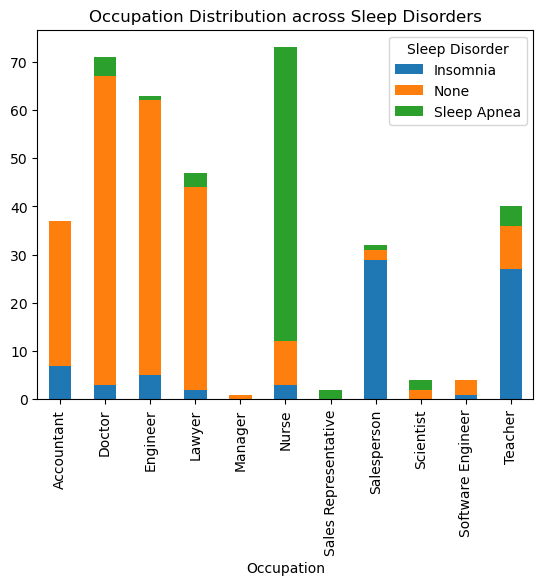

In [531]:
# Stacked Bar Chart
gender_sleep_df = pd.crosstab(sleep['Occupation'], sleep['Sleep Disorder'])
gender_sleep_df.plot(kind='bar', stacked=True)
plt.title('Occupation Distribution across Sleep Disorders')
plt.show()

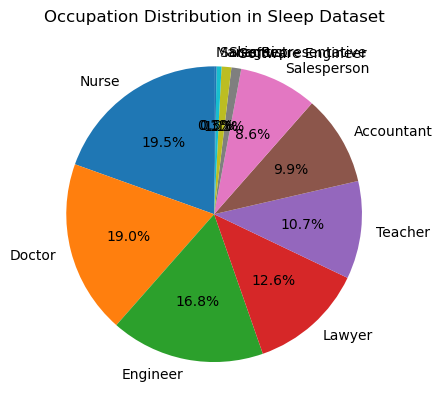

In [532]:

#Pie Chart for Occupation
gender_pie = sleep['Occupation'].value_counts()

plt.pie(gender_pie, labels=gender_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('Occupation Distribution in Sleep Dataset')
plt.show()

### Visualizing the Distribution of Sleep duration


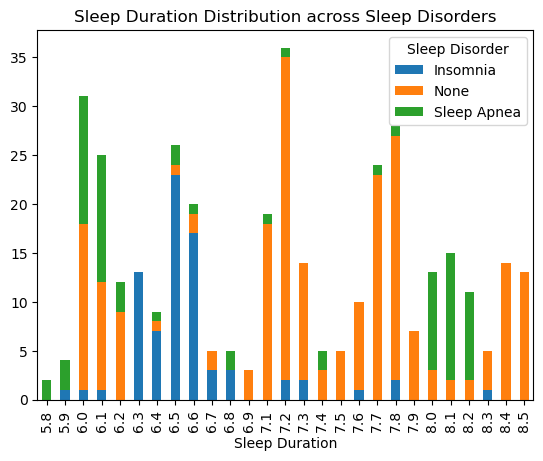

In [534]:
# Stacked Bar Chart
gender_sleep_df = pd.crosstab(sleep['Sleep Duration'], sleep['Sleep Disorder'])
gender_sleep_df.plot(kind='bar', stacked=True)
plt.title('Sleep Duration Distribution across Sleep Disorders')
plt.show()

### Visualizing the Distribution of Quality of Sleep


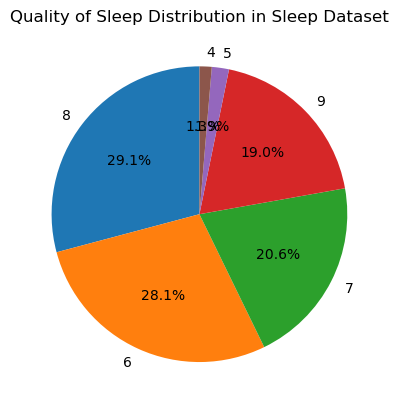

In [535]:
#Pie Chart for Quality of sleep
gender_pie = sleep['Quality of Sleep'].value_counts()

plt.pie(gender_pie, labels=gender_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('Quality of Sleep Distribution in Sleep Dataset')
plt.show()

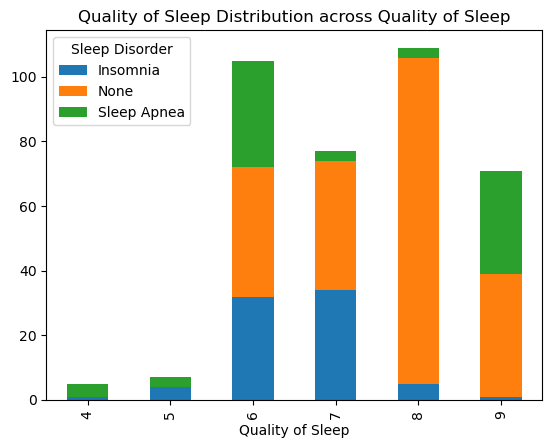

In [536]:
# Stacked Bar Chart for Quality of Sleep 
gender_sleep_df = pd.crosstab(sleep['Quality of Sleep'], sleep['Sleep Disorder'])
gender_sleep_df.plot(kind='bar', stacked=True)
plt.title('Quality of Sleep Distribution across Quality of Sleep')
plt.show()

### Visualizing the Distribution of Physical Activity Level


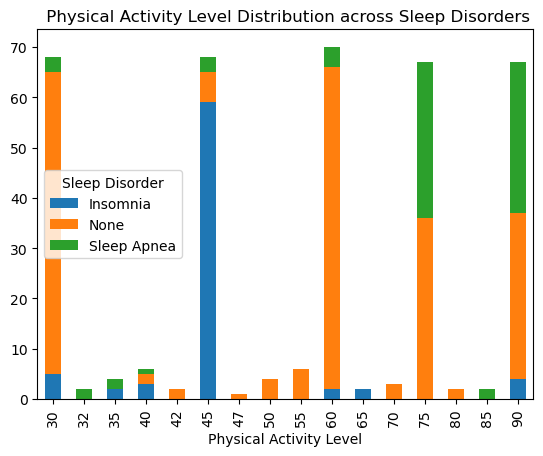

In [538]:
# Physical Activity Level Stacked Bar Chart
gender_sleep_df = pd.crosstab(sleep['Physical Activity Level'], sleep['Sleep Disorder'])
gender_sleep_df.plot(kind='bar', stacked=True)
plt.title(' Physical Activity Level Distribution across Sleep Disorders')
plt.show()


### Visualizing the Distribution of Stress Level


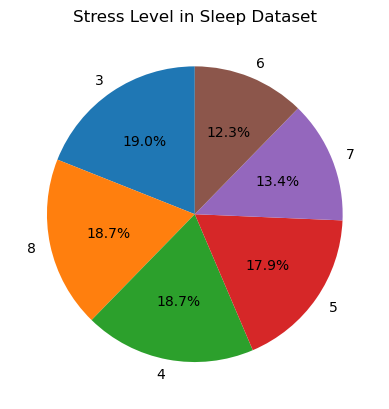

In [539]:
#Pie Chart for Stress Level
gender_pie = sleep['Stress Level'].value_counts()

plt.pie(gender_pie, labels=gender_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('Stress Level in Sleep Dataset')
plt.show()

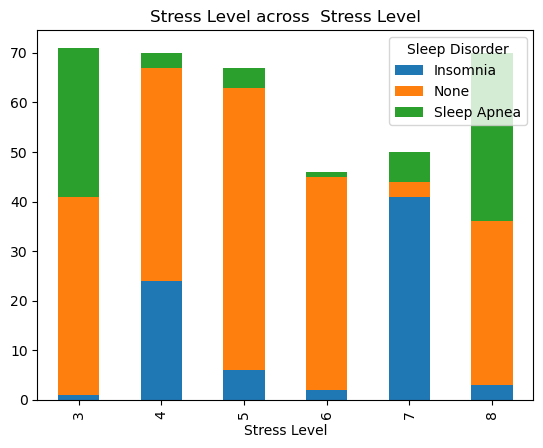

In [540]:
#  Stress Level Stacked Bar Chart
gender_sleep_df = pd.crosstab(sleep['Stress Level'], sleep['Sleep Disorder'])
gender_sleep_df.plot(kind='bar', stacked=True)
plt.title('Stress Level across  Stress Level')
plt.show()

### Visualizing the Distribution of BMI Category


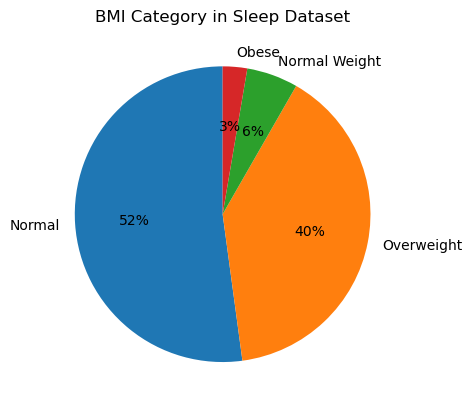

In [541]:
#Pie Chart for BMI Category
gender_pie = sleep['BMI Category'].value_counts()

plt.pie(gender_pie, labels=gender_pie.index, autopct='%1.0f%%', startangle=90)
plt.title('BMI Category in Sleep Dataset')
plt.show()

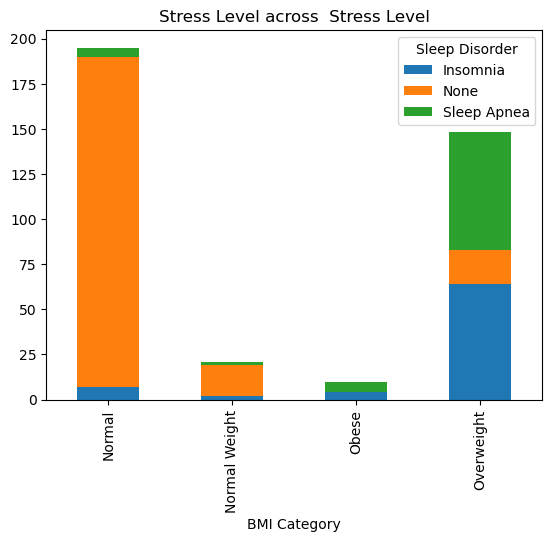

In [542]:
#  BMI Category Stacked Bar Chart
gender_sleep_df = pd.crosstab(sleep['BMI Category'], sleep['Sleep Disorder'])
gender_sleep_df.plot(kind='bar', stacked=True)
plt.title('Stress Level across  Stress Level')
plt.show()

### Visualizing the Distribution of Blood Pressure


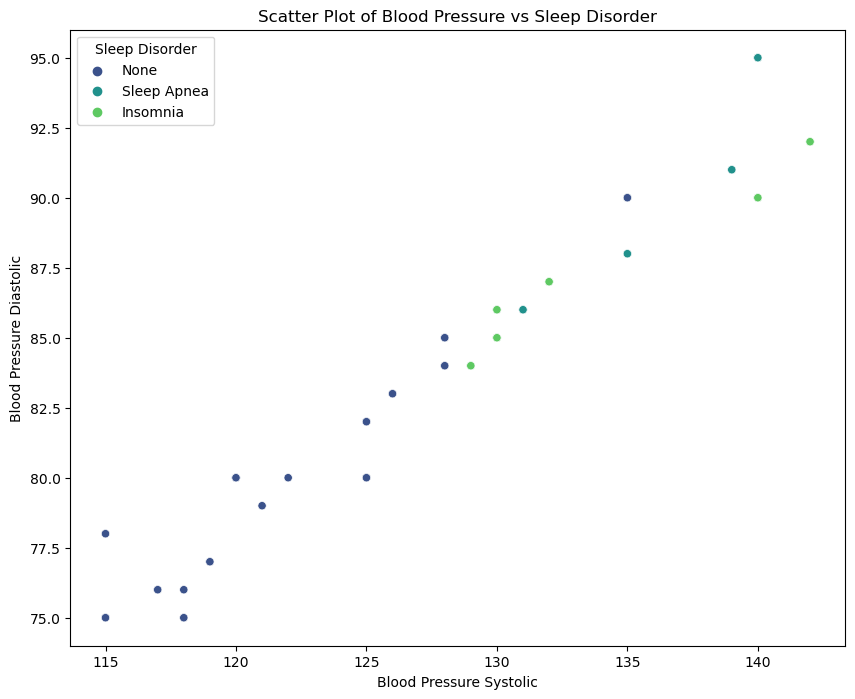

In [543]:
# Scatterplot for Blood Pressure
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sleep, x='Blood Pressure Systolic', y='Blood Pressure Diastolic', hue='Sleep Disorder', palette='viridis')

plt.title('Scatter Plot of Blood Pressure vs Sleep Disorder')
plt.xlabel('Blood Pressure Systolic')
plt.ylabel('Blood Pressure Diastolic')
plt.legend(title='Sleep Disorder')
plt.show()

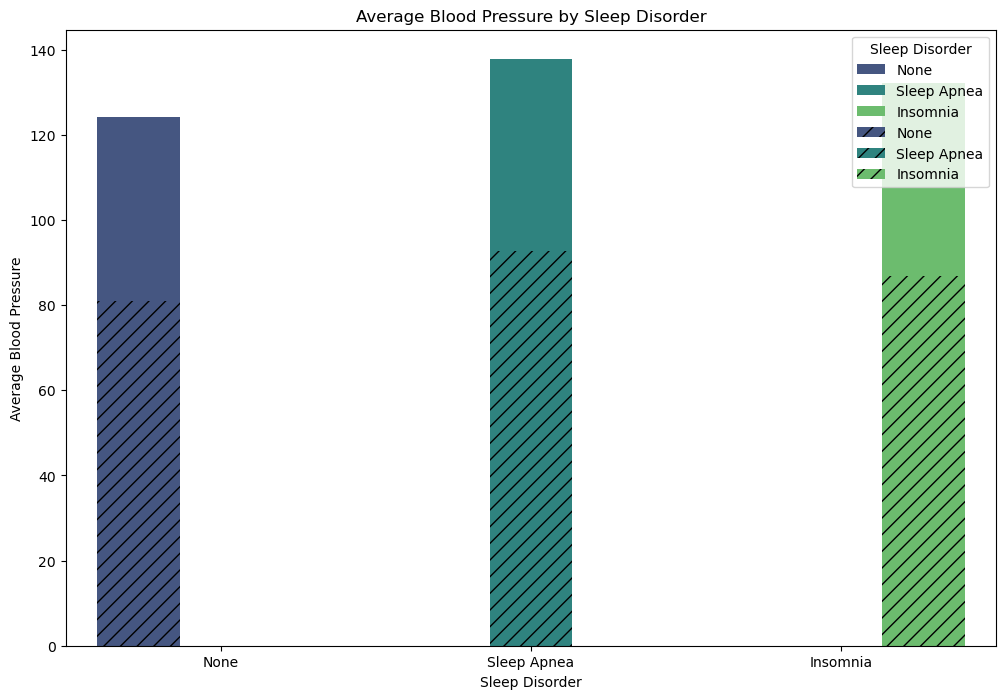

In [544]:

plt.figure(figsize=(12, 8))
sns.barplot(data=sleep, x='Sleep Disorder', y='Blood Pressure Systolic', hue='Sleep Disorder', palette='viridis', ci=None)
sns.barplot(data=sleep, x='Sleep Disorder', y='Blood Pressure Diastolic', hue='Sleep Disorder', palette='viridis', ci=None, hatch='//')

plt.title('Average Blood Pressure by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average Blood Pressure')
plt.legend(title='Sleep Disorder')
plt.show()

### Visualizing the Distribution of Heart Rate


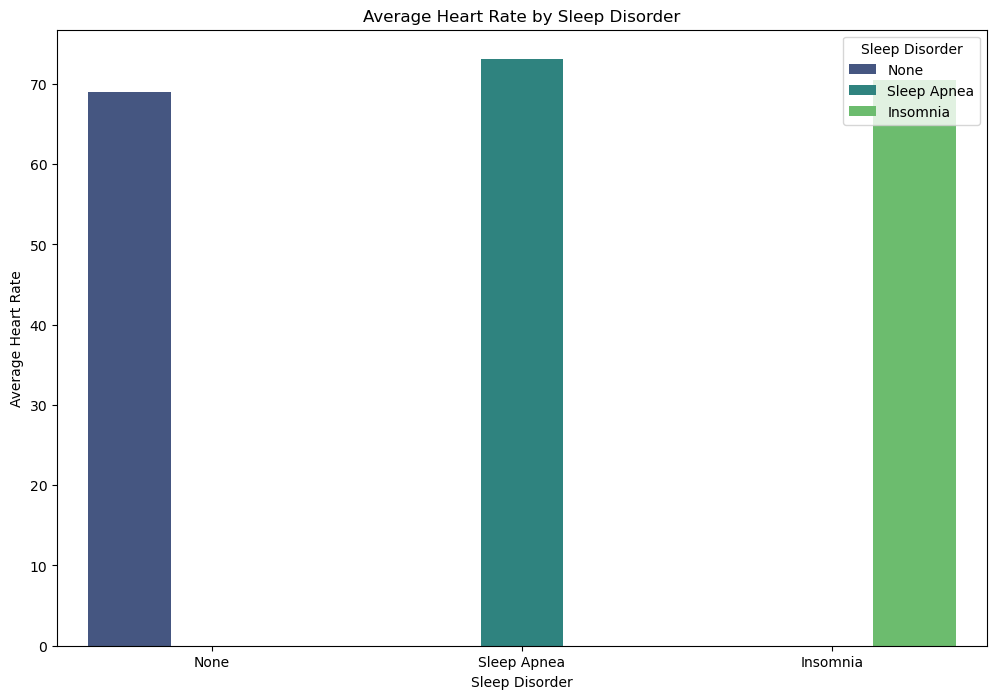

In [545]:
# Distribution for Heart Rate
plt.figure(figsize=(12, 8))
sns.barplot(data=sleep, x='Sleep Disorder', y='Heart Rate', hue='Sleep Disorder', palette='viridis', ci=None)

plt.title('Average Heart Rate by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average Heart Rate')
plt.legend(title='Sleep Disorder')
plt.show()

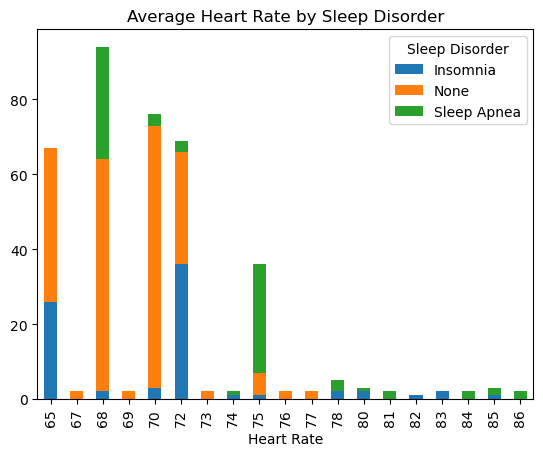

In [546]:

# Stacked Bar Chart for Heart Rate
gender_sleep_df = pd.crosstab(sleep['Heart Rate'], sleep['Sleep Disorder'])
gender_sleep_df.plot(kind='bar', stacked=True)
plt.title('Average Heart Rate by Sleep Disorder')
plt.show()


### Visualizing the Distribution of Daily Steps


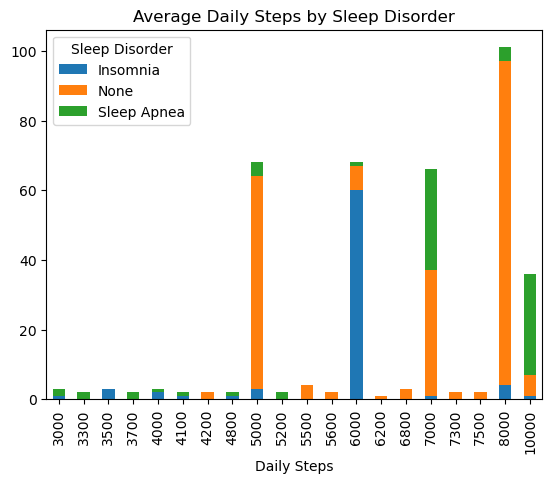

In [547]:
# Stacked Bar Chart for Daily Steps
gender_sleep_df = pd.crosstab(sleep['Daily Steps'], sleep['Sleep Disorder'])
gender_sleep_df.plot(kind='bar', stacked=True)
plt.title('Average Daily Steps by Sleep Disorder')
plt.show()

In [548]:
sleep.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Systolic,Blood Pressure Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [549]:
print(sleep.dtypes)

Gender                       object
Age                           int64
Occupation                   object
Sleep Duration              float64
Quality of Sleep              int64
Physical Activity Level       int64
Stress Level                  int64
BMI Category                 object
Heart Rate                    int64
Daily Steps                   int64
Sleep Disorder               object
Blood Pressure Systolic       int64
Blood Pressure Diastolic      int64
dtype: object


#### Nominal variables- Using get_dummies to represent catagorical variables as a new binary column


In [550]:
sleep = pd.get_dummies(sleep, columns=['Sleep Disorder'], prefix='Sleep Disorder')

In [551]:
sleep=pd.get_dummies(sleep,columns=['Gender'],prefix='Gender')

In [552]:
sleep=pd.get_dummies(sleep, columns=['Occupation'],prefix='Occupation')

#### Ordinal variables- Perform ordinal encoding to preserve the rodinal relationship

In [553]:
categories = sleep['BMI Category'].unique()
print(categories)


['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [554]:
categories = sleep['Quality of Sleep'].unique()
print(categories)


[6 4 7 5 8 9]


In [555]:
categories = sleep['Stress Level'].unique()
print(categories)


[6 8 7 4 3 5]


In [556]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal variable for BMI Category
bmi_data = sleep[['BMI Category']]


encoder = OrdinalEncoder(categories=[['Normal', 'Normal Weight', 'Overweight', 'Obese']])

bmi_encoded = encoder.fit_transform(bmi_data)

sleep['BMI Category'] = bmi_encoded

In [557]:
# Ordinal variable for Quality of Sleep
QoF_data = sleep[['Quality of Sleep']]

QoF_encoder = OrdinalEncoder(categories=[['4', '5', '6', '7','8','9']])

QoF_encoded = QoF_encoder.fit_transform(QoF_data)

sleep['Quality of Sleep'] = QoF_encoded

In [558]:
# Ordinal variable for stress level
SL_data = sleep[['Stress Level']]

SL_encoder = OrdinalEncoder(categories=[['3','4', '5', '6', '7','8']])

SL_encoded = encoder.fit_transform(bmi_data)

sleep['Stress Level'] = bmi_encoded

In [559]:
# Model bulding using machine learning

In [560]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [561]:
#'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea', 'Sleep Disorder_Insomnia' are your target variables are target variables
X = sleep.drop(['Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea', 'Sleep Disorder_Insomnia'], axis=1)
y_none = sleep['Sleep Disorder_None']
y_apnea = sleep['Sleep Disorder_Sleep Apnea']
y_insomnia = sleep['Sleep Disorder_Insomnia']

# Split the data into training and testing sets for each of them
X_train_none, X_test_none, y_train_none, y_test_none = train_test_split(X, y_none, test_size=0.2, random_state=42)
X_train_apnea, X_test_apnea, y_train_apnea, y_test_apnea = train_test_split(X, y_apnea, test_size=0.2, random_state=42)
X_train_insomnia, X_test_insomnia, y_train_insomnia, y_test_insomnia = train_test_split(X, y_insomnia, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_none_scaled = scaler.fit_transform(X_train_none)
X_test_none_scaled = scaler.transform(X_test_none)

X_train_apnea_scaled = scaler.fit_transform(X_train_apnea)
X_test_apnea_scaled = scaler.transform(X_test_apnea)

X_train_insomnia_scaled = scaler.fit_transform(X_train_insomnia)
X_test_insomnia_scaled = scaler.transform(X_test_insomnia)


### logistic regression model


In [562]:
# logistic regression model
model_none = LogisticRegression(max_iter=1000)
model_apnea = LogisticRegression(max_iter=1000)
model_insomnia = LogisticRegression(max_iter=1000)

# Fit the models
model_none.fit(X_train_none_scaled, y_train_none)
model_apnea.fit(X_train_apnea_scaled, y_train_apnea)
model_insomnia.fit(X_train_insomnia_scaled, y_train_insomnia)

# Make predictions 
y_pred_none = model_none.predict(X_test_none_scaled)
y_pred_apnea = model_apnea.predict(X_test_apnea_scaled)
y_pred_insomnia = model_insomnia.predict(X_test_insomnia_scaled)


# Confusion matrix and classification report 
print('\nConfusion Matrix for Sleep Disorder_None:')
print(confusion_matrix(y_test_none, y_pred_none))
print('\nClassification Report for Sleep Disorder_None:')
print(classification_report(y_test_none, y_pred_none))

print('\nConfusion Matrix for Sleep Disorder_Sleep Apnea:')
print(confusion_matrix(y_test_apnea, y_pred_apnea))
print('\nClassification Report for Sleep Disorder_Sleep Apnea:')
print(classification_report(y_test_apnea, y_pred_apnea))

print('\nConfusion Matrix for Sleep Disorder_Insomnia:')
print(confusion_matrix(y_test_insomnia, y_pred_insomnia))
print('\nClassification Report for Sleep Disorder_Insomnia:')
print(classification_report(y_test_insomnia, y_pred_insomnia))


Confusion Matrix for Sleep Disorder_None:
[[30  2]
 [ 2 41]]

Classification Report for Sleep Disorder_None:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        32
           1       0.95      0.95      0.95        43

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75


Confusion Matrix for Sleep Disorder_Sleep Apnea:
[[58  1]
 [ 5 11]]

Classification Report for Sleep Disorder_Sleep Apnea:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.92      0.69      0.79        16

    accuracy                           0.92        75
   macro avg       0.92      0.84      0.87        75
weighted avg       0.92      0.92      0.92        75


Confusion Matrix for Sleep Disorder_Insomnia:
[[55  4]
 [ 2 14]]

Classification Report for Sleep Disorder_Inso

### logistic regression cross-validation

In [563]:
cv_scores_none = cross_val_score(model_none, X_train_none_scaled, y_train_none, cv=5, scoring='accuracy')
cv_scores_apnea = cross_val_score(model_apnea, X_train_apnea_scaled, y_train_apnea, cv=5, scoring='accuracy')
cv_scores_insomnia = cross_val_score(model_insomnia, X_train_insomnia_scaled, y_train_insomnia, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Mean Accuracy: {cv_scores_none.mean()}')

print(f'Mean Accuracy: {cv_scores_apnea.mean()}')

print(f'Mean Accuracy: {cv_scores_insomnia.mean()}')

Mean Accuracy: 0.922994350282486
Mean Accuracy: 0.9331073446327685
Mean Accuracy: 0.9499435028248587


## k-Nearest Neighbors (KNN)


In [564]:
# k-Nearest Neighbors (KNN)

knn_model_none = KNeighborsClassifier(n_neighbors=5)
knn_model_apnea = KNeighborsClassifier(n_neighbors=5)
knn_model_insomnia = KNeighborsClassifier(n_neighbors=5)

# Fit the models
knn_model_none.fit(X_train_none_scaled, y_train_none)
knn_model_apnea.fit(X_train_apnea_scaled, y_train_apnea)
knn_model_insomnia.fit(X_train_insomnia_scaled, y_train_insomnia)

# Make predictions
knn_pred_none = knn_model_none.predict(X_test_none_scaled)
knn_pred_apnea = knn_model_apnea.predict(X_test_apnea_scaled)
knn_pred_insomnia = knn_model_insomnia.predict(X_test_insomnia_scaled)

# Confusion matrix for each sleep disorder category
print('\nConfusion Matrix for Sleep Disorder_None:')
print(confusion_matrix(y_test_none, knn_pred_none))

print('\nConfusion Matrix for Sleep Disorder_Sleep Apnea:')
print(confusion_matrix(y_test_apnea, knn_pred_apnea))

print('\nConfusion Matrix for Sleep Disorder_Insomnia:')
print(confusion_matrix(y_test_insomnia, knn_pred_insomnia))

# Classification report for each sleep disorder category
print('\nClassification Report for Sleep Disorder_None:')
print(classification_report(y_test_none, knn_pred_none))

print('\nClassification Report for Sleep Disorder_Sleep Apnea:')
print(classification_report(y_test_apnea, knn_pred_apnea))

print('\nClassification Report for Sleep Disorder_Insomnia:')
print(classification_report(y_test_insomnia, knn_pred_insomnia))



Confusion Matrix for Sleep Disorder_None:
[[29  3]
 [ 3 40]]

Confusion Matrix for Sleep Disorder_Sleep Apnea:
[[58  1]
 [ 6 10]]

Confusion Matrix for Sleep Disorder_Insomnia:
[[53  6]
 [ 2 14]]

Classification Report for Sleep Disorder_None:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.93      0.93      0.93        43

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75


Classification Report for Sleep Disorder_Sleep Apnea:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        59
           1       0.91      0.62      0.74        16

    accuracy                           0.91        75
   macro avg       0.91      0.80      0.84        75
weighted avg       0.91      0.91      0.90        75


Classification Report for Sleep Disorder_Inso

### KNN model cross-validation results


In [565]:
############################
import warnings
from scipy.stats import mode
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

############################
cv_scores_none = cross_val_score(knn_model_none, X_train_none_scaled, y_train_none, cv=5, scoring='accuracy')
cv_scores_apnea = cross_val_score(knn_model_apnea, X_train_apnea_scaled, y_train_apnea, cv=5, scoring='accuracy')
cv_scores_insomnia = cross_val_score(knn_model_insomnia, X_train_insomnia_scaled, y_train_insomnia, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Mean Accuracy_none: {cv_scores_none.mean()}')

print(f'Mean Accuracy_apnea: {cv_scores_apnea.mean()}')

print(f'Mean Accuracy_insomnia: {cv_scores_insomnia.mean()}')

Mean Accuracy_none: 0.9196045197740114
Mean Accuracy_apnea: 0.9363841807909605
Mean Accuracy_insomnia: 0.9332203389830509


## Dicision Tree model


In [566]:
# Assuming Decision Tree as an example model
model_none_dt = DecisionTreeClassifier(random_state=42)
model_apnea_dt = DecisionTreeClassifier(random_state=42)
model_insomnia_dt = DecisionTreeClassifier(random_state=42)

# Fit the models
model_none_dt.fit(X_train_none_scaled, y_train_none)
model_apnea_dt.fit(X_train_apnea_scaled, y_train_apnea)
model_insomnia_dt.fit(X_train_insomnia_scaled, y_train_insomnia)

# Make predictions 
y_pred_none_dt = model_none_dt.predict(X_test_none_scaled)
y_pred_apnea_dt = model_apnea_dt.predict(X_test_apnea_scaled)
y_pred_insomnia_dt = model_insomnia_dt.predict(X_test_insomnia_scaled)

# Confusion matrix and classification report 
print('\nConfusion Matrix for Sleep Disorder_None (Decision Tree):')
print(confusion_matrix(y_test_none, y_pred_none_dt))
print('\nClassification Report for Sleep Disorder_None (Decision Tree):')
print(classification_report(y_test_none, y_pred_none_dt))

print('\nConfusion Matrix for Sleep Disorder_Sleep Apnea (Decision Tree):')
print(confusion_matrix(y_test_apnea, y_pred_apnea_dt))
print('\nClassification Report for Sleep Disorder_Sleep Apnea (Decision Tree):')
print(classification_report(y_test_apnea, y_pred_apnea_dt))

print('\nConfusion Matrix for Sleep Disorder_Insomnia (Decision Tree):')
print(confusion_matrix(y_test_insomnia, y_pred_insomnia_dt))
print('\nClassification Report for Sleep Disorder_Insomnia (Decision Tree):')
print(classification_report(y_test_insomnia, y_pred_insomnia_dt))


Confusion Matrix for Sleep Disorder_None (Decision Tree):
[[30  2]
 [ 1 42]]

Classification Report for Sleep Disorder_None (Decision Tree):
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.95      0.98      0.97        43

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75


Confusion Matrix for Sleep Disorder_Sleep Apnea (Decision Tree):
[[57  2]
 [ 3 13]]

Classification Report for Sleep Disorder_Sleep Apnea (Decision Tree):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.87      0.81      0.84        16

    accuracy                           0.93        75
   macro avg       0.91      0.89      0.90        75
weighted avg       0.93      0.93      0.93        75


Confusion Matrix for Sleep Disorder_Insomnia (D

#### Dicision Tree model cross-validation results


In [567]:
cv_scores_none = cross_val_score(model_none, X_train_none_scaled, y_train_none, cv=5, scoring='accuracy')
cv_scores_apnea = cross_val_score(model_apnea, X_train_apnea_scaled, y_train_apnea, cv=5, scoring='accuracy')
cv_scores_insomnia = cross_val_score(model_insomnia, X_train_insomnia_scaled, y_train_insomnia, cv=5, scoring='accuracy')

# cross-validation scores
print(f'Mean accuracy_none: {cv_scores_none.mean()}')

print(f'Mean accuracy_apnea: {cv_scores_apnea.mean()}')

print(f'Mean accuracy_insomnia: {cv_scores_insomnia.mean()}')




Mean accuracy_none: 0.922994350282486
Mean accuracy_apnea: 0.9331073446327685
Mean accuracy_insomnia: 0.9499435028248587


## Random Forest model


In [568]:
# Assuming Random Forest as an example model
model_none_rf = RandomForestClassifier(random_state=42)
model_apnea_rf = RandomForestClassifier(random_state=42)
model_insomnia_rf = RandomForestClassifier(random_state=42)

# Fit the models
model_none_rf.fit(X_train_none_scaled, y_train_none)
model_apnea_rf.fit(X_train_apnea_scaled, y_train_apnea)
model_insomnia_rf.fit(X_train_insomnia_scaled, y_train_insomnia)

# Make predictions 
y_pred_none_rf = model_none_rf.predict(X_test_none_scaled)
y_pred_apnea_rf = model_apnea_rf.predict(X_test_apnea_scaled)
y_pred_insomnia_rf = model_insomnia_rf.predict(X_test_insomnia_scaled)

# Confusion matrix and classification report 
print('\nConfusion Matrix for Sleep Disorder_None (Random Forest):')
print(confusion_matrix(y_test_none, y_pred_none_rf))
print('\nClassification Report for Sleep Disorder_None (Random Forest):')
print(classification_report(y_test_none, y_pred_none_rf))

print('\nConfusion Matrix for Sleep Disorder_Sleep Apnea (Random Forest):')
print(confusion_matrix(y_test_apnea, y_pred_apnea_rf))
print('\nClassification Report for Sleep Disorder_Sleep Apnea (Random Forest):')
print(classification_report(y_test_apnea, y_pred_apnea_rf))

print('\nConfusion Matrix for Sleep Disorder_Insomnia (Random Forest):')
print(confusion_matrix(y_test_insomnia, y_pred_insomnia_rf))
print('\nClassification Report for Sleep Disorder_Insomnia (Random Forest):')
print(classification_report(y_test_insomnia, y_pred_insomnia_rf))


Confusion Matrix for Sleep Disorder_None (Random Forest):
[[30  2]
 [ 1 42]]

Classification Report for Sleep Disorder_None (Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.95      0.98      0.97        43

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75


Confusion Matrix for Sleep Disorder_Sleep Apnea (Random Forest):
[[57  2]
 [ 5 11]]

Classification Report for Sleep Disorder_Sleep Apnea (Random Forest):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.85      0.69      0.76        16

    accuracy                           0.91        75
   macro avg       0.88      0.83      0.85        75
weighted avg       0.90      0.91      0.90        75


Confusion Matrix for Sleep Disorder_Insomnia (R

### Random forest cross validation

In [569]:

#  Random Forest 
model_none_rf = RandomForestClassifier(random_state=42)
model_apnea_rf = RandomForestClassifier(random_state=42)
model_insomnia_rf = RandomForestClassifier(random_state=42)

# cross-validation 
cv_scores_none = cross_val_score(model_none_rf, X_train_none_scaled, y_train_none, cv=5, scoring='accuracy')
cv_scores_apnea = cross_val_score(model_apnea_rf, X_train_apnea_scaled, y_train_apnea, cv=5, scoring='accuracy')
cv_scores_insomnia = cross_val_score(model_insomnia_rf, X_train_insomnia_scaled, y_train_insomnia, cv=5, scoring='accuracy')

print(f'Mean Accuracy_none: {cv_scores_none.mean()}')

print(f'Mean Accuracy_apnea: {cv_scores_apnea.mean()}')

print(f'Mean Accuracy_insomnia: {cv_scores_insomnia.mean()}')

Mean Accuracy_none: 0.9130508474576271
Mean Accuracy_apnea: 0.9464406779661017
Mean Accuracy_insomnia: 0.9532768361581923


### Dicision Tree Model performed better than the other models.